In [87]:
import pandas as pd 
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../full_dataset_main_20tickers.csv",encoding='utf-8') #need the encoding to correctly display emojis
df = df.drop(columns=['num_comments', 'selftext', 'score', 'oldid', 'author', 'fulltext_processed'])

In [3]:
print(df.loc[705]['fulltext']) #just testing

Weekly AMZN SPCE TSLA SPY MU OTM calls. I am sorry for breaking up with you 🌈🐻. Now I am TAX👏WRITEOFF👏GANG👏 


In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ferasdahrooge/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ferasdahrooge/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ferasdahrooge/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ferasdahrooge/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from emoji import is_emoji

In [7]:
#just testing algo here

str = df.loc[705]['fulltext'] + "+10000%!!!"
print(str)
for i in str:
    if is_emoji(i):
        print(i, type(i))
        
words = word_tokenize(str)
print(words)
emoji = []
punc_exceptions = ['+', '-']
filtered_text = ""
for word in words:
    
    if word[0] in punc_exceptions:
        word = word.replace(word, word[0])
        filtered_text += word.lower() + ' '
        continue
    
    for char in word:
        if is_emoji(char):
            emoji.append(char)
            #word = word.replace(char, ' ')  ##not sure if neccesary to preserve tax writeoff gang
            
    if word.lower() not in stopwords and word.isalpha() and len(word)>1:
        filtered_text += word.lower() + ' '

for i in emoji:
    filtered_text += i + ' '

print(filtered_text)

Weekly AMZN SPCE TSLA SPY MU OTM calls. I am sorry for breaking up with you 🌈🐻. Now I am TAX👏WRITEOFF👏GANG👏 +10000%!!!
🌈 <class 'str'>
🐻 <class 'str'>
👏 <class 'str'>
👏 <class 'str'>
👏 <class 'str'>
['Weekly', 'AMZN', 'SPCE', 'TSLA', 'SPY', 'MU', 'OTM', 'calls', '.', 'I', 'am', 'sorry', 'for', 'breaking', 'up', 'with', 'you', '🌈🐻', '.', 'Now', 'I', 'am', 'TAX👏WRITEOFF👏GANG👏', '+10000', '%', '!', '!', '!']
weekly amzn spce tsla spy mu otm calls sorry breaking + 🌈 🐻 👏 👏 👏 


In [8]:
def lemmatize(text):
    lemmatized_text = []
    for word in text.split():
        lemmatized_word = WordNetLemmatizer().lemmatize(word)
        if lemmatized_word not in lemmatized_text:
            lemmatized_text.append(lemmatized_word)
    return ' '.join(lemmatized_text)

In [9]:
def preprocessText(str):
    words = word_tokenize(str)
    emoji = []
    punc_exceptions = ['+', '-'] #add more if needed, don't think there's anything else we want to include
    filtered_text = ""
    for word in words:
        
        #check if the first character of the word is + or -, then drop the rest of the word except the sign if it is
        if word[0] in punc_exceptions:
            word = word.replace(word, word[0])
            filtered_text += word.lower() + ' '
            continue
        
        #check if word contains emojis. Add emojis to a different list so they don't get removed in the next check below
        for char in word:
            if is_emoji(char):
                emoji.append(char)
                #word = word.replace(char, ' ')
                
        #standard preprocessing conditions, no need to check punctuation as isalpha will remove them
        if word.lower() not in stopwords and word.isalpha() and len(word)>1:
            filtered_text += word.lower() + ' '

    filtered_text = lemmatize(filtered_text)

    #add emojis back to the end of the final text
    for i in emoji:
        filtered_text += ' '+ i + ' '

    return filtered_text.strip()
        

In [10]:
df['processed_text'] = df['fulltext'].apply(preprocessText)

In [11]:
df['Time of Creation'] = pd.to_datetime(df['Time of Creation']).dt.date
df

,newid,id,title,Time of Creation,new_id,fulltext,ticker,processed_text
0,1,ac1ox8,Sneak peek - Tomorrow's follow-up $AAPL announ...,2019-01-02,t3_ac1ox8,Sneak peek - Tomorrow's follow-up $AAPL announ...,AAPL,sneak peek - tomorrow aapl announcement
1,2,ac05lf,$AAPL &amp; Cook taking us home!,2019-01-02,t3_ac05lf,$AAPL &amp; Cook taking us home!,AAPL,aapl amp cook taking u home
2,3,abwjpx,AAPL DD,2019-01-02,t3_abwjpx,AAPL DD I live in a major U.S City and I attem...,AAPL,aapl dd live major city attempted buy apple ai...
3,4,abth0l,TSLA MISSES PRODUCTION NUMBERS,2019-01-02,t3_abth0l,TSLA MISSES PRODUCTION NUMBERS,TSLA,tsla miss production number
4,5,abt60l,AMD Leaks: Ryzen 3 3800X (16 cores at 4.7Ghz C...,2019-01-02,t3_abt60l,AMD Leaks: Ryzen 3 3800X (16 cores at 4.7Ghz C...,AMD,amd leak ryzen core confirmed
...,...,...,...,...,...,...,...,...
17781,17782,yt80ho,"Bought $946,646 GME and AMC Update: Gain +$111...",2022-11-12,t3_yt80ho,"Bought $946,646 GME and AMC Update: Gain +$111...",GME,bought gme amc update gain + far
17782,17783,yt7uzu,GME reversal or nah?,2022-11-12,t3_yt7uzu,GME reversal or nah? GME holding its floor pri...,GME,gme reversal nah holding floor price approx si...
17783,17784,yuetk8,Puts in TSLA? Tesla loses control injuring 7 a...,2022-11-13,t3_yuetk8,Puts in TSLA? Tesla loses control injuring 7 a...,TSLA,put tsla tesla loses control injuring killing
17784,17785,yviv2x,200K $AMC Calls! Going to add following the me...,2022-11-14,t3_yviv2x,200K $AMC Calls! Going to add following the me...,AMC,amc call going add following meme stock trend


In [12]:
df.to_csv('main_dataset.csv')

In [13]:
df1 = pd.DataFrame(df.processed_text.str.split(expand=True).stack().value_counts(), columns=['Mentions'])
df1['Word'] = df1.index

In [14]:
df1[:20]

,Mentions,Word
🚀,21745,🚀
gme,8263,gme
share,4045,share
stock,3884,stock
like,3399,like
http,3130,http
buy,3107,buy
-,3009,-
short,3003,short
get,2995,get


## Visualization based on the top 5 tickers

In [459]:
from collections import Counter
top_5 = Counter(" ".join(df["ticker"]).split()).most_common(5)
top_5_list = []
for i in range(len(top_5)):
    top_5_list.append(top_5[i][0])
    
#get top 5 tickers
print(top_5_list)

['GME', 'BBBY', 'AMC', 'TSLA', 'BB']


In [460]:
df2 = df[["Time of Creation" , "ticker"]]
#get top 5 ticker rows for dataframe
df2_top_5 = df2[df2.ticker.isin(top_5_list)]

In [461]:
df2_top_5['year_month'] = pd.to_datetime(df['Time of Creation']).dt.to_period('M')
df2_top_5 = df2_top_5.drop(["Time of Creation"], axis = 1)

/var/folders/gg/j9k_n1253cn__3qb4ymvx31r0000gn/T/ipykernel_41009/2523948770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_top_5['year_month'] = pd.to_datetime(df['Time of Creation']).dt.to_period('M')


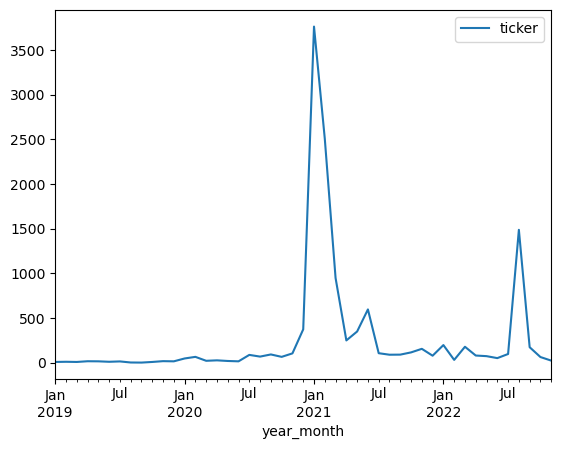

In [462]:
# Mentioning based on Month
top_ticker_mentions_by_month = df2_top_5.groupby("year_month")['ticker'].count().plot(legend = True)

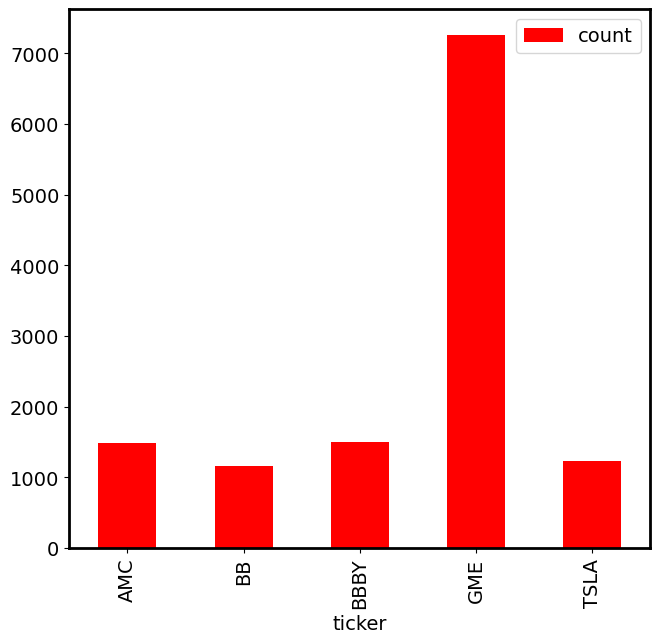

In [624]:
top_tickers_period_by_month = df2_top_5.groupby(df2_top_5["year_month"]).value_counts(ascending = True)

pd.plotting.register_matplotlib_converters()
# plotting top 5 
top_tickers_period_by_month = top_tickers_period_by_month.reset_index()
top_tickers_period_by_month.columns = ['date', 'ticker', 'count']

top_tickers_period_by_month_bar = top_tickers_period_by_month.groupby(top_tickers_period_by_month["ticker"]).sum().plot(kind = 'bar' , color = 'red')

In [683]:
total_months = top_tickers_period_by_month["date"].max() - top_tickers_period_by_month["date"].min()
top_tickers_period_by_month_pivot = top_tickers_period_by_month.pivot(index="ticker", columns= "date" , values = "count")
top_tickers_period_by_month_pivot = top_tickers_period_by_month_pivot.fillna(0)
top_tickers_period_by_month_pivot

date,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,...,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11
ticker,,,,,,,,,,,,,,,,,,,,,
AMC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,9.0,4.0,5.0,7.0,8.0,36.0,8.0,2.0,6.0
BB,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0
BBBY,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,4.0,1.0,3.0,2.0,1326.0,120.0,10.0,0.0
GME,0.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,1.0,...,14.0,153.0,48.0,48.0,33.0,69.0,109.0,40.0,28.0,8.0
TSLA,9.0,9.0,9.0,14.0,16.0,9.0,14.0,1.0,1.0,8.0,...,11.0,11.0,24.0,19.0,9.0,19.0,14.0,6.0,24.0,10.0


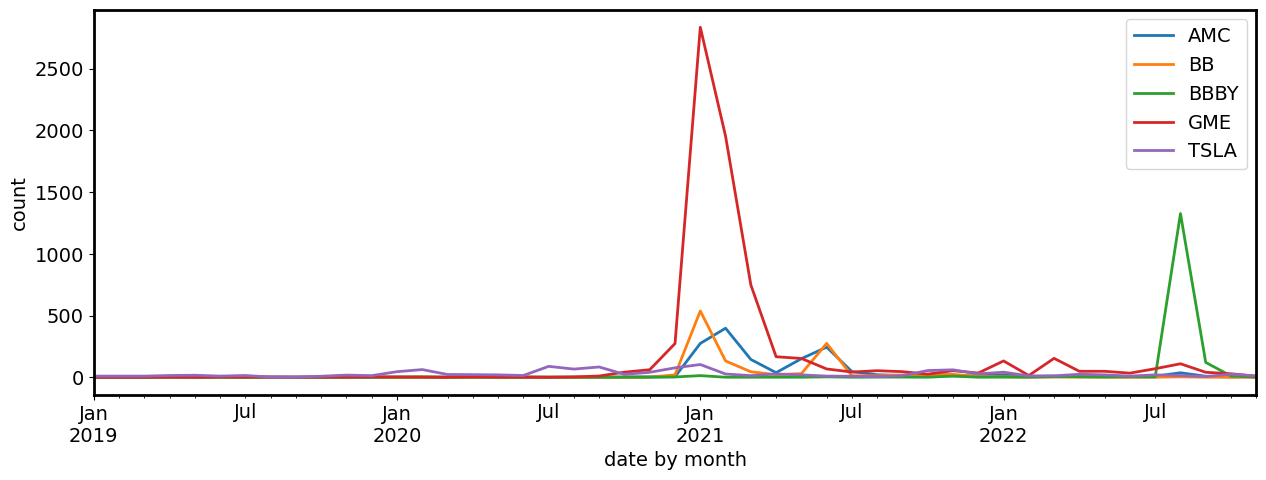

In [688]:
for i in range(len(top_5_list)):
    line = top_tickers_period_by_month_pivot.iloc[i]
    line.plot(figsize = [15,5], legend = True)
plt.xlabel("date by month")
plt.ylabel("count")
plt.show()

In [689]:
#get one for year alone
df3 = df[["Time of Creation" , "ticker"]]
df3_top_5 = df3[df3.ticker.isin(top_5_list)]
df3_top_5['year'] = pd.to_datetime(df3_top_5['Time of Creation']).dt.year
df3_top_5 = df3_top_5.drop(["Time of Creation"], axis = 1)

/var/folders/gg/j9k_n1253cn__3qb4ymvx31r0000gn/T/ipykernel_41009/1659684636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_top_5['year'] = pd.to_datetime(df3_top_5['Time of Creation']).dt.year


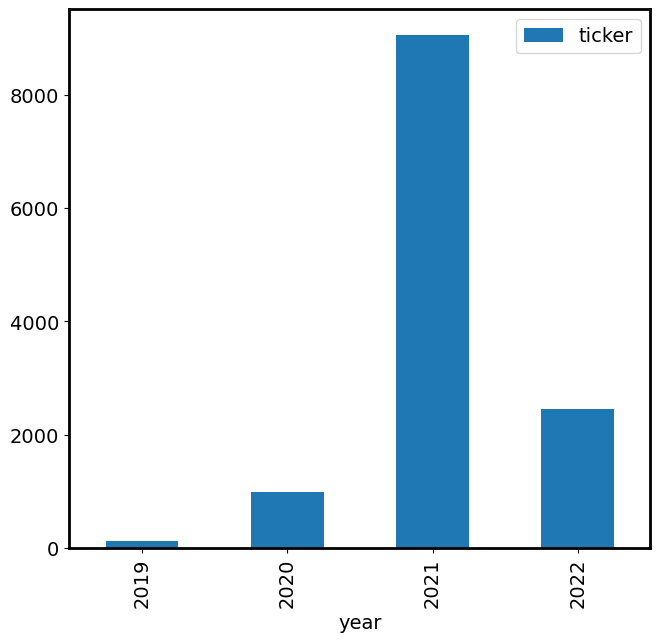

In [690]:
ticker_mentions_by_year = df3_top_5.groupby(df3_top_5["year"]).count()
ticker_mentions_by_year.plot(kind = "bar")
top_tickers_period_by_year = df3_top_5.groupby(df3_top_5["year"]).value_counts()

In [691]:
ticker_mentions_by_year = top_tickers_period_by_year.reset_index()
ticker_mentions_by_year.columns = ['date', 'ticker', 'count']

In [692]:
top_tickers_period_by_year_pivot = ticker_mentions_by_year.pivot(index="ticker", columns= "date", values = "count")
top_tickers_period_by_year_pivot = top_tickers_period_by_year_pivot.fillna(0)
top_tickers_period_by_year_pivot

date,2019,2020,2021,2022
ticker,,,,
AMC,0.0,15.0,1364.0,111.0
BB,2.0,21.0,1129.0,12.0
BBBY,2.0,5.0,27.0,1471.0
GME,12.0,394.0,6174.0,682.0
TSLA,120.0,559.0,362.0,188.0


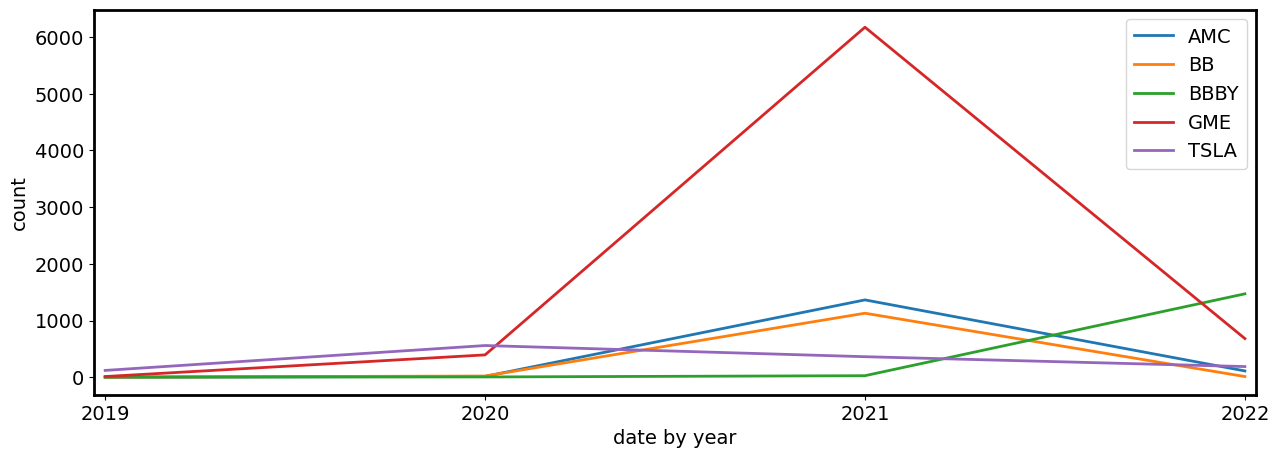

In [693]:
for i in range(len(top_5_list)):
    line = top_tickers_period_by_year_pivot.iloc[i]
    line.plot(xticks =top_tickers_period_by_year_pivot.columns,  figsize = [15,5], legend = True)
plt.xlabel("date by year")
plt.ylabel("count")
plt.show()